In [1]:
using DifferentialEquations
using Plots
using DiffEqFlux
using Optim
using Flux

In [2]:
function latka_volterra!(du, u, p, t)
    üê∞, üê∫ = u
    Œ±, Œ≤, Œ≥, Œ¥ = p
    du[1] = düê∞ = Œ± * üê∞ - Œ≤ * üê∞ * üê∫
    du[2] = düê∫ = Œ≥ * üê∞ * üê∫ - Œ¥ * üê∫
end

function noiseterm!(du, u, p, t)
    üê∞, üê∫ = u
    du[1] = 0.3 * üê∞
    du[2] = 0.3 * üê∫
end

u‚ÇÄ = [1.0, 1.0]
tspan = (0.0, 10.0)
p = [1.5, 2.0, 3.0, 5.5]

#prob = SDEProblem(latka_volterra!, noiseterm!, u‚ÇÄ, tspan, p)
prob = ODEProblem(latka_volterra!, u‚ÇÄ, tspan, p)
sol = solve(prob)

p1 = plot(sol)
p2 = plot(sol, vars=(1, 2))
plot(p1, p2)

In [3]:
ensembleprob = EnsembleProblem(prob)
sol = solve(ensembleprob, EnsembleThreads(), trajectories=10)
ensemble_summary = EnsembleSummary(sol)
p1 = plot(ensemble_summary)
p2 = plot(sol, vars=(1, 2))
plot(p1, p2)

In [17]:
function lorenz!(du, u, p, t)
    œÉ, œÅ, Œ≤ = p
    x, y, z = u
    du[1] = œÉ * (y - x)
    du[2] = x * (œÅ - z) - y
    du[3] = x *  y - Œ≤ * z
end 

u‚Çí = [1, 1, 3]
tspan = (0.0, 200.0)
p = [10, 28, 8/3]

prob = ODEProblem(lorenz!, u‚Çí, tspan, p)
sol = solve(prob)

p1 = plot(sol, vars=(1, 2, 3))

---
# Glycolysis 

In [5]:
function glycolysis!(du, u, p, t)
    a, b = p
    x, y = u
    du[1] = -x + b * y + x^2 * y
    du[2] = a - b * y - x^2 * y
end;

a = 0.5
b = 0.05
p = [a, b]
u‚Çí = [2.0, 2.0] # [0.5, 2.5] 
tspan = (0.0, 1000.0)

plt = plot(xlim=xlim, ylim=ylim, size=(800, 800), legend=false)
for b in vcat(0.05:0.01:1, 2:0.01:2.1)
    p = [a, b]
    tspan = (0.0, 100.0)

    problem = ODEProblem(glycolysis!, u‚Çí, tspan, p)
    solution = solve(problem)
    plot!(plt, solution, vars=(1, 2), xlim=xlim, ylim=ylim)
end;
plt

LoadError: UndefVarError: xlim not defined

---
# Van der Pol oscillator
$$
\ddot{x} + \mu \dot{x}(x^2 - 1) + x = 0
$$

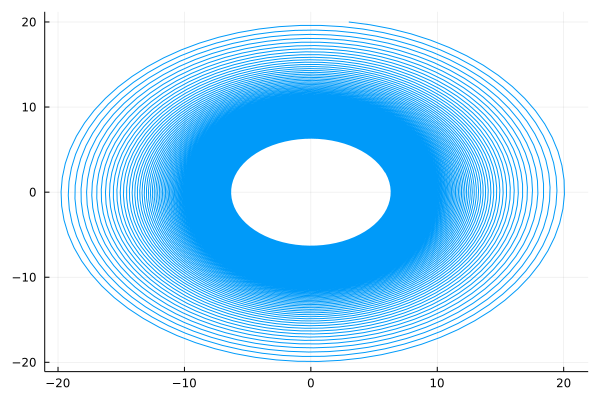

In [6]:
function van_der_pol_osscillator!(du, u, Œº, t)
    x, w = u
    du[1] = w - Œº * (x^3 / 3 - x)
    du[2] = -x
end;
u‚Çí = [3.0, 20.0]
Œº = 0.0001
tspan = (0.0, 1000.0)
problem = ODEProblem(van_der_pol_osscillator!, u‚Çí, tspan, Œº)
solution = solve(problem)
plot(solution, vars=(1, 2), legend=false)